# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from pathlib import Path
#from dotenv import load_dotenv
#import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

## Part 1 - Personal Finance Planner

### Gather Investments Data

In [3]:
AAPL_path = Path("../Data Collection Notebooks/asset_historical_prices/AAPL.csv")
AAPL = pd.read_csv(AAPL_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
AAPL.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [4]:
AMZN_path = Path("../Data Collection Notebooks/asset_historical_prices/AMZN.csv")
AMZN = pd.read_csv(AMZN_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
AMZN.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [5]:
TSLA_path = Path("../Data Collection Notebooks/asset_historical_prices/TSLA.csv")
TSLA = pd.read_csv(TSLA_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
TSLA.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [6]:
NVDA_path = Path("../Data Collection Notebooks/asset_historical_prices/NVDA.csv")
NVDA = pd.read_csv(NVDA_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
NVDA.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [7]:
META_path = Path("../Data Collection Notebooks/asset_historical_prices/META.csv")
META = pd.read_csv(META_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
META.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [8]:
GOOGL_path = Path("../Data Collection Notebooks/asset_historical_prices/GOOGL.csv")
GOOGL = pd.read_csv(GOOGL_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
GOOGL.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [9]:
MSFT_path = Path("../Data Collection Notebooks/asset_historical_prices/MSFT.csv")
MSFT = pd.read_csv(MSFT_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
MSFT.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [10]:
JPM_path = Path("../Data Collection Notebooks/asset_historical_prices/JPM.csv")
JPM = pd.read_csv(JPM_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
JPM.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [11]:
KO_path = Path("../Data Collection Notebooks/asset_historical_prices/KO.csv")
KO = pd.read_csv(KO_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
KO.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [12]:
PG_path = Path("../Data Collection Notebooks/asset_historical_prices/PG.csv")
PG = pd.read_csv(PG_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
PG.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [13]:
PEP_path = Path("../Data Collection Notebooks/asset_historical_prices/PEP.csv")
PEP = pd.read_csv(PEP_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
PEP.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [14]:
BTC_path = Path("../Data Collection Notebooks/asset_historical_prices/BTC-USD.csv")
BTC = pd.read_csv(BTC_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
BTC.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [15]:
ETH_path = Path("../Data Collection Notebooks/asset_historical_prices/ETH-USD.csv")
ETH = pd.read_csv(BTC_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
ETH.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [16]:
AGG_path = Path("../Data Collection Notebooks/bonds/AGG.csv")
AGG = pd.read_csv(BTC_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
AGG.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [19]:
age = int(input("What is your age?"))
stock_selection = int(input("Please select whether you would like portfolio consisting of aggressive, moderate or conservative performing stocks.  Select '1' for aggressive, '2' for moderate, and '3' for conservative:"))
investment_amount = int(input("How much do you want to invest?"))
investment_period = int(input("How many years do you want to invest?"))
stock_allocation = 110 - age
bond_allocation = 100 - stock_allocation - 5

if stock_selection == 1:
    df_stock_data = pd.concat([AAPL,AMZN,TSLA,NVDA,META,BTC,ETH,AGG], axis=1, keys=['AAPL','AMZN','TSLA','NVDA','META','BTC','ETH','AGG'])
    df_stock_data = df_stock_data.dropna()
elif stock_selection == 2:
    df_stock_data = pd.concat([AAPL,AMZN,JPM,GOOGL,MSFT,BTC,ETH,AGG], axis=1, keys=['AAPL','AMZN','GOOGL','MSFT','JPM','BTC','ETH','AGG'])
    df_stock_data = df_stock_data.dropna()
elif stock_selection == 3:
    df_stock_data = pd.concat([AAPL,AMZN,KO,PG,PEP,BTC,ETH,AGG], axis=1, keys=['AAPL','AMZN','KO','PG','PEP','BTC','ETH','AGG'])
    df_stock_data = df_stock_data.dropna()


What is your age? 53
Please select whether you would like portfolio consisting of aggressive, moderate or conservative performing stocks.  Select '1' for aggressive, '2' for moderate, and '3' for conservative: 2
How much do you want to invest? 150000
How many years do you want to invest? 10


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [20]:
# Configuring a Monte Carlo simulation to forecast Y years of cumulative returns
# df_ticker is df_stock_data here
sim_returns = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [(stock_allocation/500), (stock_allocation/500),(stock_allocation/500),(stock_allocation/500),(stock_allocation/500),.025,.025,(bond_allocation/100)],
    num_simulation=500,
    num_trading_days=252*investment_period
)

sim_returns.portfolio_data.head() # Checking the simulation input data

AAPL                                              \
                 open       high        low      close  adj close   
Date                                                                
2014-09-17  25.317499  25.450001  25.147499  25.395000  22.760485   
2014-09-18  25.482500  25.587500  25.389999  25.447500  22.807531   
2014-09-19  25.572500  25.587500  25.125000  25.240000  22.621561   
2014-09-22  25.450001  25.535000  25.145000  25.264999  22.643967   
2014-09-23  25.150000  25.735001  25.135000  25.660000  22.997986   

                                           AMZN                        ...  \
                 volume daily_return       open       high        low  ...   
Date                                                                   ...   
2014-09-17  243706000.0          NaN  16.388000  16.400000  16.076000  ...   
2014-09-18  149197600.0     0.002067  16.271999  16.355000  16.185499  ...   
2014-09-19  283609600.0    -0.008154  16.379999  16.638000  16.278500  ...   
2014-09-22  211153600.0     0.000990  16.424500  16.474501  16.052999  ...   
2014-09-23  253608800.0     0.015634  16.122999  16.379999  16.062500  ...   

                   ETH                                  AGG              \
             adj close      volume daily_return        open        high   
Date                                                                      
2014-09-17  457.334015  21056800.0          NaN  465.864014  468.174011   
2014-09-18  424.440002  34483200.0    -0.071926  456.859985  456.859985   
2014-09-19  394.795990  37919700.0    -0.069843  424.102997  427.834991   
2014-09-22  402.152008  24127600.0     0.018632  399.100006  406.915985   
2014-09-23  435.790985  45099500.0     0.083647  402.092010  441.557007   

                                                                         
                   low       close   adj close      volume daily_return  
Date                                                                     
2014-09-17  452.421997  457.334015  457.334015  21056800.0          NaN  
2014-09-18  413.104004  424.440002  424.440002  34483200.0    -0.071926  
2014-09-19  384.532013  394.795990  394.795990  37919700.0    -0.069843  
2014-09-22  397.130005  402.152008  402.152008  24127600.0     0.018632  
2014-09-23  396.196991  435.790985  435.790985  45099500.0     0.083647  

[5 rows x 56 columns]

In [21]:
sim_returns.calc_cumulative_return() # Forecast cumulative returns

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 110.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 120.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 130.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 140.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 150.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 160.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 170.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 180.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 190.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 200.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 210.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 220.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 230.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 240.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 250.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 260.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 270.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 280.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 290.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 300.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 310.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 320.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 330.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 340.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 350.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 360.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 370.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 380.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 390.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 400.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 410.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 420.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 430.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 440.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 450.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 460.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 470.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 480.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

Running Monte Carlo simulation number 490.


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:117:

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.032005,1.014696,0.991290,1.022467,1.010084,0.993679,0.995989,1.025273,0.994522,1.003751,...,0.993673,0.995512,1.006512,0.985639,1.044274,1.045620,1.007486,1.005805,1.012947,1.013578
2,1.022157,1.043739,1.016037,1.027151,1.007005,0.990769,0.987228,1.025435,0.992236,0.993948,...,1.014138,1.007753,0.988012,0.987234,1.034665,1.026965,0.981385,1.012084,0.978645,1.032608
3,1.030986,1.048002,1.013756,1.031283,1.040932,1.009562,1.016809,1.056290,0.994931,1.019146,...,1.024857,1.017140,0.974540,0.990355,1.035742,1.047917,0.956038,1.037667,0.976355,1.052761
4,1.046786,1.020727,1.012595,1.008043,1.071272,1.016421,1.021691,1.075948,0.987351,1.001483,...,0.997957,1.025493,0.984272,1.000198,1.010467,1.037176,0.938945,1.015374,0.948051,1.092771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,31.435191,114.028701,49.881705,143.560116,21.298440,21.540318,68.049936,145.856335,62.233148,25.840800,...,135.142923,86.263851,5.452097,48.554462,55.830474,6.663901,77.688203,98.641125,136.712721,58.369504
2517,30.893442,113.087048,50.372003,145.723284,21.216119,22.124900,69.031849,144.726851,62.012218,25.617318,...,137.545473,87.885728,5.455441,49.452988,56.833278,6.750196,78.384616,101.130928,136.873585,59.075105
2518,30.186469,112.143281,50.009156,148.507231,21.302102,21.800653,70.610459,148.215254,61.274992,25.429182,...,138.831457,88.811322,5.480841,50.256179,56.395061,6.814371,78.322379,98.919442,140.365409,59.152448
2519,30.079672,114.058934,50.727073,150.178247,21.452344,22.156941,72.600407,147.512363,60.173703,25.176047,...,143.435913,85.666006,5.497745,50.830589,57.622166,6.752270,79.863578,100.353866,140.049874,59.330078


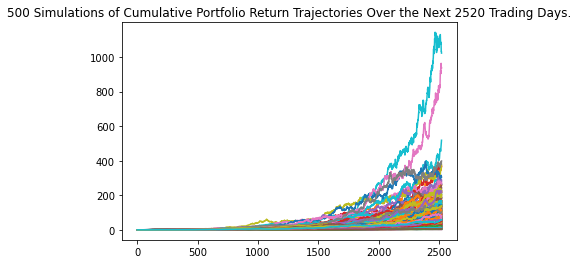

In [22]:
plots = sim_returns.plot_simulation() # To depict an image with simulation outcomes

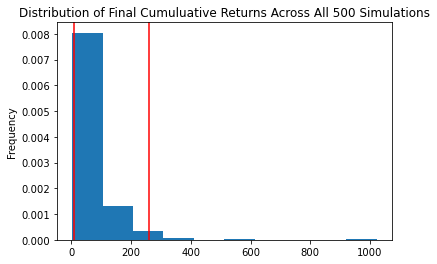

In [23]:
dist_plot = sim_returns.plot_distribution() # Plot probability distribution and confidence intervals

### Retirement Analysis

In [24]:
# Fetch summary statistics from the Monte Carlo simulation results
all_stats = sim_returns.summarize_cumulative_return()

print(all_stats)

count            500.000000
mean              69.471130
std               86.262644
min                2.530919
25%               26.182182
50%               45.427592
75%               80.309574
max             1021.994779
95% CI Lower       7.995571
95% CI Upper     260.766274
Name: 2520, dtype: float64


/Users/warrendenetsosie/Desktop/FinTech/Project_3/Financial Analysis Notebooks/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [26]:
# Set initial investment
#initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
port_high_return = round(investment_amount * all_stats[9],2) 
port_low_return = round(investment_amount * all_stats[8],2)

# Print results
print(f"There is a 95% chance that an initial investment of ${investment_amount} in the portfolio"
      f" over the next {investment_period} years will end within in the range of"
      f" ${port_low_return} and ${port_high_return}")

There is a 95% chance that an initial investment of $150000 in the portfolio over the next 10 years will end within in the range of $1199335.72 and $39114941.13
